
**Описание задачи**:<br>
Перед нами стоит задача классификации, то есть предсказание по неким входным параметрам класса (или какого-либо признака) объекта. В данном случае необходимо определить бинарный категориальный признак stroke (был у пациента инсульт или нет) исходя из 11-ти признаков.

Импортируем необходимые модули:

In [6]:
! pip install numpy pandas matplotlib seaborn pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import numpy as np                      
import pandas as pd                
import matplotlib.pyplot as plt 
import seaborn as sbn         
import pandas as pd

%matplotlib inline

Выведем данные на экран:

In [8]:
path = "./healthcare-dataset-stroke-data.csv"
data = pd.read_csv(path)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Визуализация данных**:<br>
Для начала удалим столбец `id`, так как он не несет никакой смысловой нагрузки и является всего лишь идентификатором записи.

In [9]:
data = data.drop(labels = "id", axis = 1)

Вычислим основные характеристики.<br>
В таблице показаны только численные признаки:<br>
1 Количество значений (видно, что есть пропуски в столбце num_ingredients)<br>
2 Среднее значение<br>
3 Стандартное отклонение<br>
4 Минимальное значение<br>
5 Первый квартиль<br>
6 Медиана<br>
7 Третий квартиль<br>
8 Максимальное значение

In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Для признаков типа `object` приведены количество значений, количество уникальных значений, самое распространенные значение и частота наиболее распространенного значения:

In [11]:
data.describe(include = ['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Также отметим ряд интересных зависимостей между признаками. <br>
Например, инсульт немного чаще проявляется у мужчин.

<Axes: xlabel='gender', ylabel='stroke'>

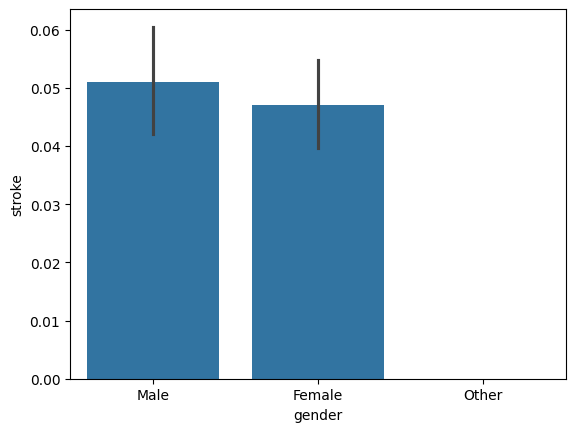

In [12]:
sbn.barplot(x = 'gender', y = 'stroke', data = data)

И гораздо чаще у людей, имеющих сердечные заболевания.

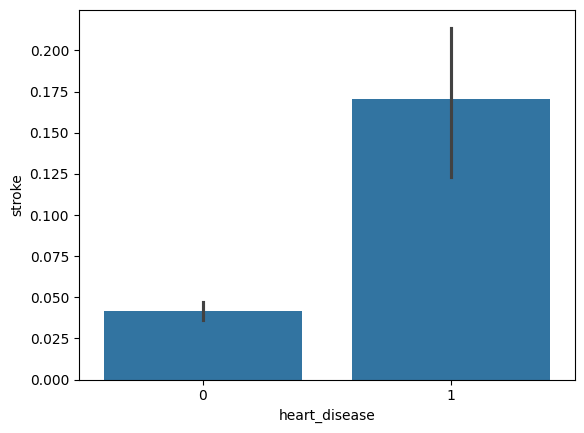

In [13]:
sbn.barplot(x = 'heart_disease', y = 'stroke', data = data);

Выведем матрицу корреляции наших численных признаков:

In [16]:
data.corr(numeric_only=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000



По данной матрице можно сделать вывод, что почти все признаки не зависимы друг от друга.<br>
Для примера визуализируем один из графиков:

Text(0.5, 1.0, 'heart_disease vs bmi')

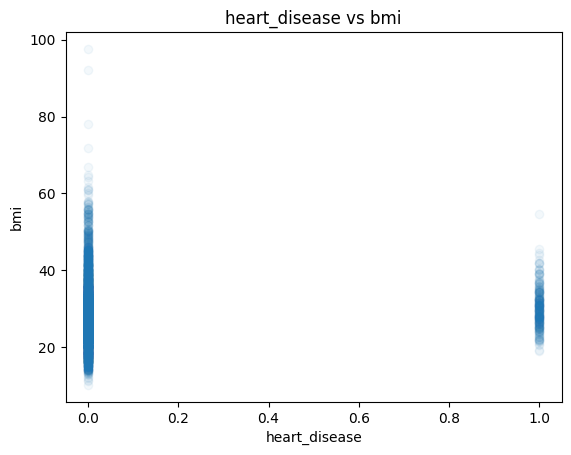

In [17]:
plt.plot(data['heart_disease'], data['bmi'], 'o', alpha = 0.05)
plt.xlabel('heart_disease')
plt.ylabel('bmi')
plt.title('heart_disease vs bmi')

**Подготовим данные**<br>
Обработаем пропущенные значения - они присутвуют только в индексе массы тела (столбец `bmi`). Заменим пропущенные значения на 0:



In [18]:
data["bmi"] = data["bmi"].fillna(0, axis=0)

Разделим категориальные и числовые признаки. 

In [19]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Выведем все уникальные значения для каждого категориального признака:

In [20]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Признаки `gender`, `work_type`, `smoking_status` имеют несколько варинатов (больше двух) и являются небинарными. Аналогично признаки `ever_married`, `Residence_type` можно отнести к бинарным.

In [21]:
data_describe = data.describe(include=['object'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['ever_married', 'Residence_type']
nonbinary_columns= ['gender', 'work_type', 'smoking_status']


Заменим небинарные признаки на более удобные, например: gender [Female, Male, Other] на gender_Female, gender_Male, gender_Other. С остальными аналогично:

In [22]:
data_object = pd.get_dummies(data[nonbinary_columns])
print(data_object.columns)

Index(['gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


**Нормализация**<br>
Все числовые признаки, кроме stroke, нормализуем при помощи линейного преобразования к отрезку [0, 1]:

In [23]:
numerical_columns_exept_is_stroke = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
data_numerical_exept_is_stroke = data[numerical_columns_exept_is_stroke]
data_numerical_exept_is_stroke = (data_numerical_exept_is_stroke - data_numerical_exept_is_stroke.min(axis = 0)) / (data_numerical_exept_is_stroke.max(axis = 0) - data_numerical_exept_is_stroke.min(axis = 0))
data_numerical_exept_is_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.526692,0.097456,0.054012,0.235563,0.284393
std,0.276033,0.296607,0.226063,0.209046,0.097638
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304199,0.000000,0.000000,0.102137,0.234631
50%,0.548340,0.000000,0.000000,0.169721,0.283811
75%,0.743652,0.000000,0.000000,0.272228,0.336066
max,1.000000,1.000000,1.000000,1.000000,1.000000


Соединим все данные:

In [24]:
data = pd.concat((data['stroke'], data_numerical_exept_is_stroke, data_object), axis = 1)
print(data.shape)

(5110, 18)


In [51]:
data

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0.0,1.0,0.801265,0.375000,False,True,False,False,False,True,False,False,False,True,False,False
1,1,0.743652,0.0,0.0,0.679023,0.000000,True,False,False,False,False,False,True,False,False,False,True,False
2,1,0.975586,0.0,1.0,0.234512,0.332992,False,True,False,False,False,True,False,False,False,False,True,False
3,1,0.597168,0.0,0.0,0.536008,0.352459,True,False,False,False,False,True,False,False,False,False,False,True
4,1,0.963379,1.0,0.0,0.549349,0.245902,True,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1.0,0.0,0.132167,0.000000,True,False,False,False,False,True,False,False,False,False,True,False
5106,0,0.987793,0.0,0.0,0.323516,0.409836,True,False,False,False,False,False,True,False,False,False,True,False
5107,0,0.426270,0.0,0.0,0.128658,0.313525,True,False,False,False,False,False,True,False,False,False,True,False
5108,0,0.621582,0.0,0.0,0.513203,0.262295,False,True,False,False,False,True,False,False,False,True,False,False


**Разделим данные на обучающую и тестовую выборки:**<br>
Для классификации по признаку stroke, будем использовать все входные признаки, кроме, разумеется, самого stroke.

In [25]:
x = data.drop('stroke', axis = 1)
y = data['stroke']
feature_names = x.columns
x = x.to_numpy()
y = y.to_numpy()
print(x.shape)
print(y.shape)
N, d = x.shape

(5110, 17)
(5110,)


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3832 1278


**Обучение**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
y_test_predict = knn_10.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.04929577464788732

Попробуем с количеством соседей K = 3:

In [31]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
y_test_predict = knn_3.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.06259780907668232

И с количеством соседей K = 5:

In [32]:
knn_5 = KNeighborsClassifier(n_neighbors = 8)
knn_5.fit(X_train, y_train)
y_test_predict = knn_5.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.04929577464788732

**Вычисление ошибки на обучающей и тестовой выборках**

In [33]:
y_train_pred = knn_10.predict(X_train)
y_test_pred = knn_10.predict(X_test)
y_train_score = np.mean(y_train != y_train_pred)
y_test_score = np.mean(y_test != y_test_pred)
y_train_score, y_test_score

(0.04801670146137787, 0.04929577464788732)

При использовании 10 ближайших соседей на обучающей выборке ошибка получилась 4.8%, на тестовой 4.93%

In [34]:
y_train_pred = knn_3.predict(X_train)
y_test_pred = knn_3.predict(X_test)
y_train_score = np.mean(y_train != y_train_pred)
y_test_score = np.mean(y_test != y_test_pred)
y_train_score, y_test_score

(0.042014613778705634, 0.06259780907668232)

При использовании 3-х ближайших соседей на обучающей выборке ошибка получилась 4.2%, на тестовой 6.26%

In [35]:
y_train_pred = knn_5.predict(X_train)
y_test_pred = knn_5.predict(X_test)
y_train_score = np.mean(y_train != y_train_pred)
y_test_score = np.mean(y_test != y_test_pred)
y_train_score, y_test_score

(0.04749478079331942, 0.04929577464788732)

При использовании 5 ближайших соседей на обучающей выборке ошибка получилась 4.7%, на тестовой 4.93%

**Вывод**: Процент правильно предсказанных значений методом k ближайших соседей выше 93% на обучающей и тестовой выборках - это отличный показатель. По результатам вычислений можно видеть, что при 5 ближайщих соседях метод дает налучший результат - ошибка на тестовой выборке составляет 4.93%, а на обучающей 4.7%.

**Общий вывод**: В данной работе был проведен анализ датасета, который содержит различные данные о человеке. Целевым признаком, который было необходимо предсказать, являлся числовой признак stroke - возникновение инсульта. Была решена задача классификации с использованием метода kNN.<br>
Проведенные этапы работы:<br>

-Чтение, визуализация и анализ данных<br> 
-Обработка пропущенных значений<br>
-Разделение признаков<br>
-Обработка категориальных признаков<br>
-Нормализация данных при помощи линейного преобразования к отрезку<br>
-Разбиение данных на обучающие и тестовые выборки<br>
-Запуск классификатора kNN<br>
-Вычисление ошибок<br>
-Выводы<br>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Логистическая регрессия

In [39]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_y_pred=lr.predict(X_test)

err_test  = np.mean(y_test  != lr_y_pred)
err_train  = np.mean(y_train != lr.predict(X_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.04879958246346555
Ошибка на тестировочной выборке 0.04929577464788732


        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3646
           1       0.00      0.00      0.00       186

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.95      0.93      3832

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278

        Confusion Matrix for Training Logistic Regression 
        Confusion Matrix for Testing Logistic Regression 


c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

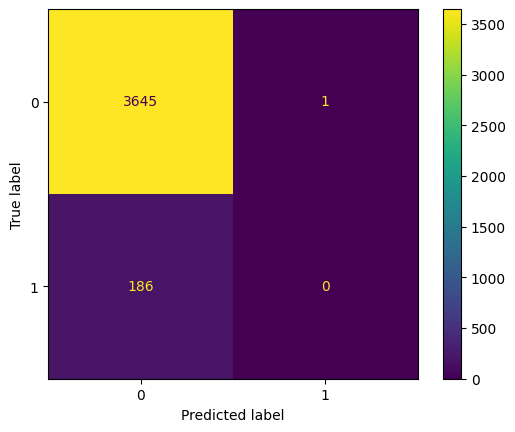

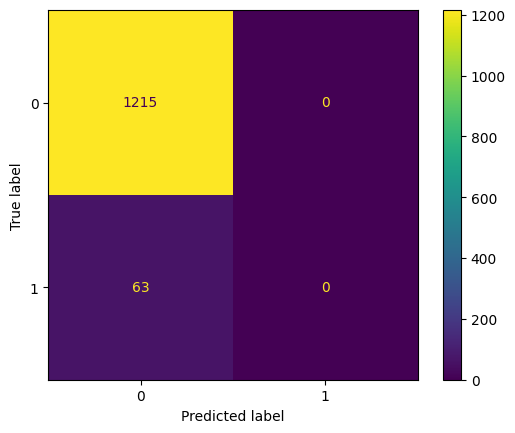

In [40]:
print('        Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(X_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

print('        Confusion Matrix for Training Logistic Regression \n',ConfusionMatrixDisplay.from_estimator(lr,X_train,y_train))
print('        Confusion Matrix for Testing Logistic Regression \n',ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test))


## Random Forest

In [42]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

err_test  = np.mean(y_test  != rf_y_pred)
err_train  = np.mean(y_train != rf.predict(X_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.00026096033402922753
Ошибка на тестировочной выборке 0.048513302034428794


        Training Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3646
           1       1.00      0.99      1.00       186

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

        Testing Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1215
           1       0.57      0.06      0.11        63

    accuracy                           0.95      1278
   macro avg       0.76      0.53      0.54      1278
weighted avg       0.93      0.95      0.93      1278

        Confusion Matrix for Training Random Forest Classifier 
        Confusion Matrix for Testing Random Foresr Classifier


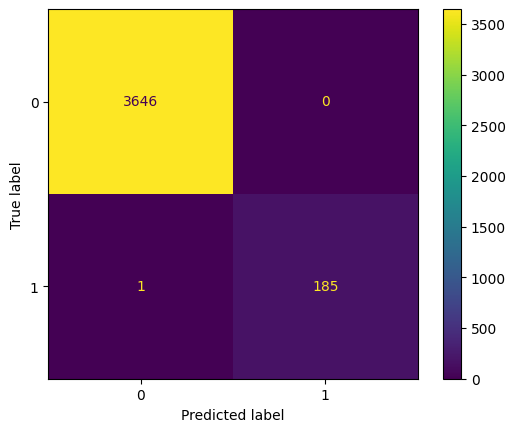

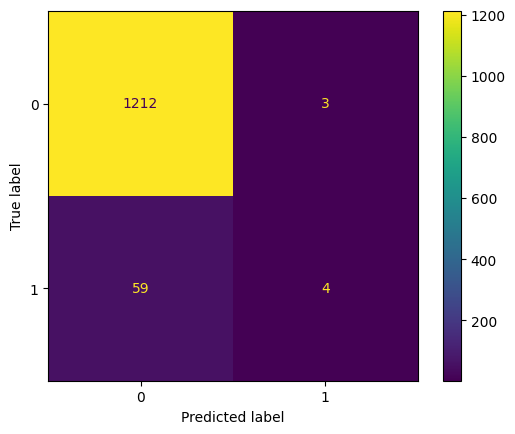

In [43]:
print('        Training Classification report for Random Forest Classifier \n',classification_report(y_train,rf.predict(X_train)))
print('        Testing Classification Report for Random Forest Classifier \n',classification_report(y_test,rf_y_pred))


print('        Confusion Matrix for Training Random Forest Classifier \n',ConfusionMatrixDisplay.from_estimator(rf,X_train,y_train))
print('        Confusion Matrix for Testing Random Foresr Classifier\n',ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test))


# Полносвязная неглубокая нейронная сеть

c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Pyt

Ошибка на тренировочной выборке 0.048538622129436326
Ошибка на тестировочной выборке 0.04929577464788732
        Training Classification report for MLP 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3646
           1       0.00      0.00      0.00       186

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.95      0.93      3832

        Testing Classification Report for MLP 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278

        Confusion Matrix for Training MLP 
        Confusion Matrix for Testing MLP 


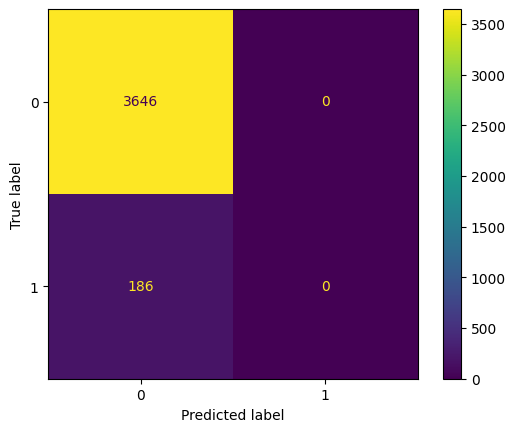

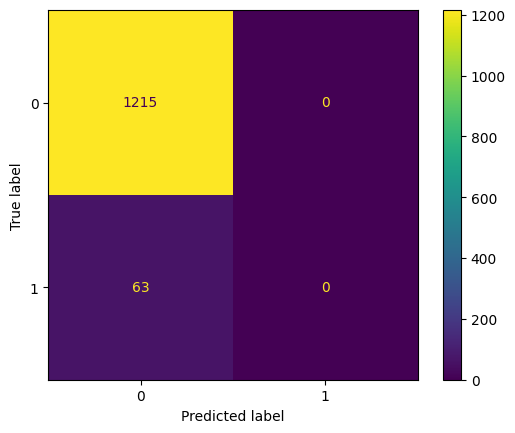

In [44]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 7, max_iter=100)

mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

print('        Training Classification report for MLP \n',classification_report(y_train,y_train_predict))
print('        Testing Classification Report for MLP \n',classification_report(y_test,y_test_predict))

print('        Confusion Matrix for Training MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,X_train,y_train))
print('        Confusion Matrix for Testing MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,X_test,y_test))

In [45]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'adam', activation = 'logistic', max_iter=100, random_state = 7)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

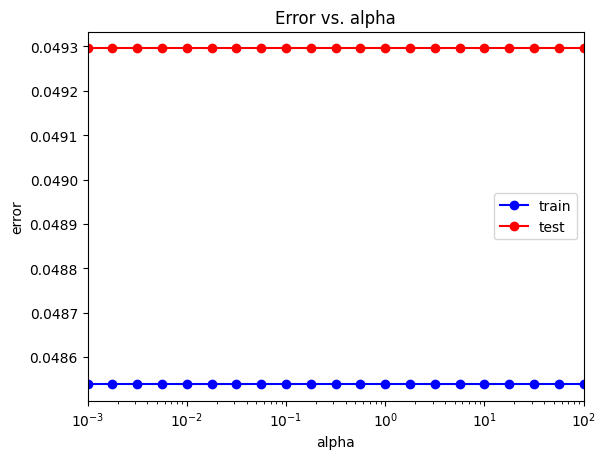

In [46]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

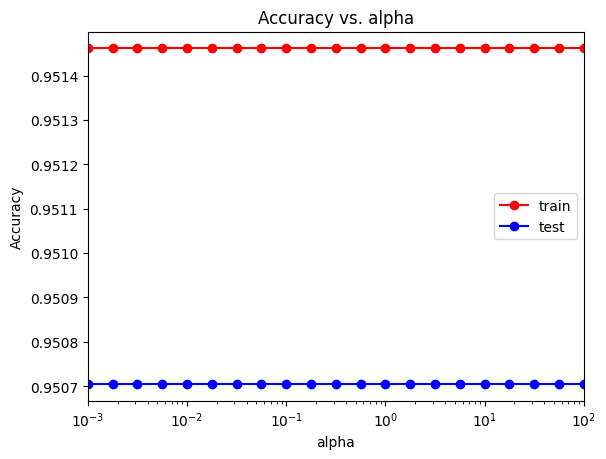

In [47]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"{min_train_err=}\n{min_test_err=}")

min_train_err=0.048538622129436326
min_test_err=0.04929577464788732


In [49]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(f"{alpha_opt=}")

alpha_opt=array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02])


## Полносвязная неглубокая нейронная сеть с оптимальный alpha

Ошибка на тренировочной выборке 0.048538622129436326
Ошибка на тестировочной выборке 0.04929577464788732
        Training Classification report for MLP 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3646
           1       0.00      0.00      0.00       186

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.91      0.95      0.93      3832

        Testing Classification Report for MLP 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1215
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.95      0.93      1278

        Confusion Matrix for Training MLP 
        Confusion Matrix for Testing MLP 


c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\79200\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

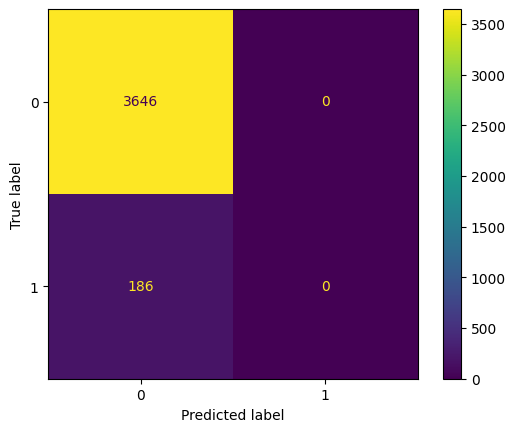

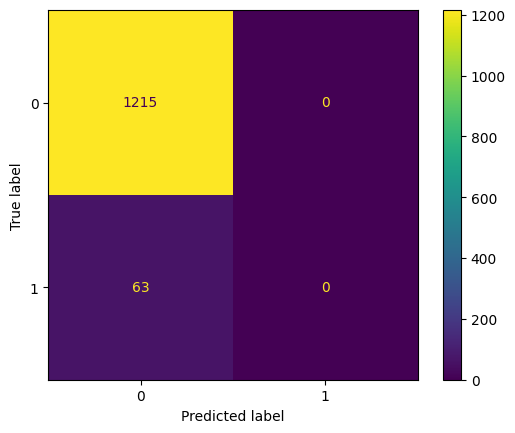

In [50]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (20,),
                          solver = 'adam', activation = 'logistic', random_state = 7, max_iter=500)
mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

print('        Training Classification report for MLP \n',classification_report(y_train,y_train_predict))
print('        Testing Classification Report for MLP \n',classification_report(y_test,y_test_predict))

print('        Confusion Matrix for Training MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,X_train,y_train))
print('        Confusion Matrix for Testing MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,X_test,y_test))

# Результаты

- Логистическая регрессия  
 
| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.95       | 1   | 0.97 |  

Время: 14s  
Ошибка на тренировочной выборке 0.048  
Ошибка на тестировочной выборке 0.049 
  
- Random Forest  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 1.00       | 1   | 1 |  

Время: 24s  
Ошибка на тренировочной выборке 0.0  
Ошибка на тестировочной выборке 0.04  
  
- MLP  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.95       | 1   | 0.98 |  

Время: 4m 44s  
Ошибка на тренировочной выборке 0.048  
Ошибка на тестировочной выборке 0.049  
  
Лучше всех и быстрее справился алгоритм Логистической регрессии. Этого следовало ожидать, так как алгоритмы, работаютщие на деревьях, плохо справляются, когда имеется большое количество разрозненных признаков. Логистическая регрессия напротив хорошо справляется с такими случаями. Нейросесть смогла достичь такой же точности, но с учетом гораздо большего затраченного времени.